In [1]:
import sklearn
import numpy as np
import sklearn.datasets
import sklearn.neighbors
import matplotlib.pyplot as plt

In [2]:
class CustomKNeighborsClassifier:
    def __init__(self, nn, p=2) -> None:
        self.nn = nn
        self.p = p

    def fit(self, X, y):
        self.X, self.y = X, y
        return self

    def get_topk(self, X):
        nn = self.nn
        p = self.p
        distances = np.abs(self.X - X[:, None])
        distances = np.power(distances.sum(-1), 1/p)
        top_k = distances.argsort(-1)[:, :nn]
        return self.y[top_k]

    def predict_proba(self, X):
        nn = self.nn
        y_pred = self.get_topk(X)  # .mean(-1)
        classes = np.unique(self.y).tolist()
        ret = np.zeros((X.shape[0], len(classes)))
        for i, pred in enumerate(y_pred):
            freq = self.itemfreq(pred)
            for c, f in freq:
                index = classes.index(c)
                ret[i][index] = f
        ret = ret / nn
        # ret = self.softmax(ret,axis=-1)
        return ret


    def softmax(self,x, axis=0):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=axis, keepdims=True)  # only difference


    def itemfreq(self,arr, axis=None):
        values, counts = np.unique(arr, return_counts=True, axis=axis)
        result = np.column_stack((values, counts))
        return result

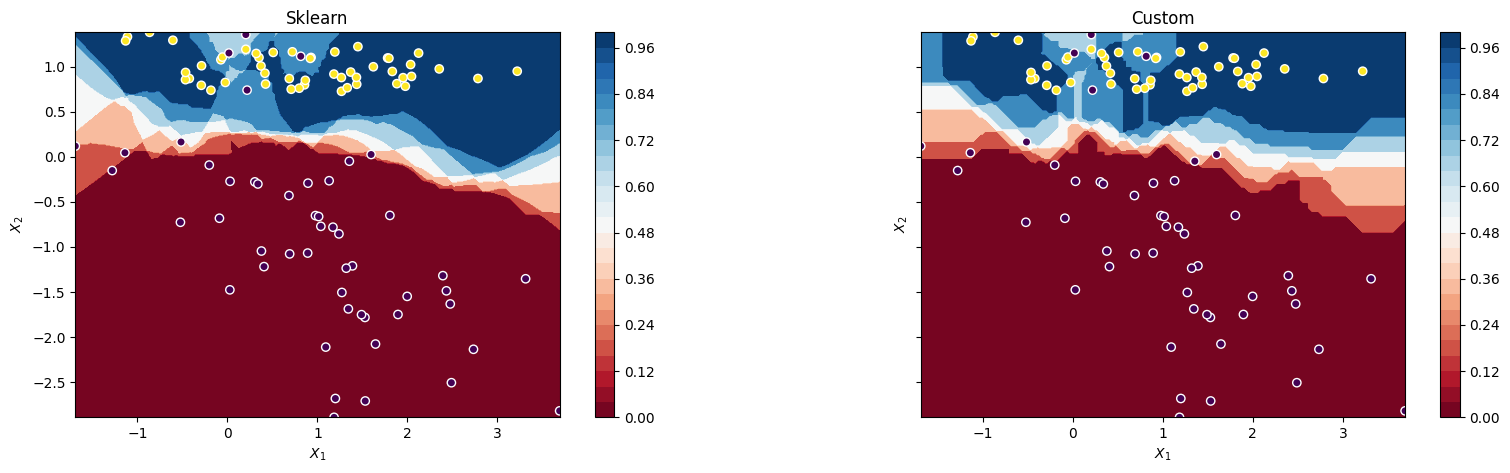

In [3]:
nn = 6
p = 4
X, y = sklearn.datasets.make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=0,n_classes=2,n_clusters_per_class=1)
y+=1
ylim = X[:, 1].min(), X[:, 1].max()
xlim = X[:, 0].min(), X[:, 0].max()
xx, yy = np.mgrid[xlim[0]:xlim[1]:.01, ylim[0]:ylim[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]


def draw(probs, f, ax, title):
    contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu")
    ax_c = f.colorbar(contour)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="white")
    ax.set(aspect="equal", xlim=xlim, ylim=ylim,
           xlabel="$X_1$", ylabel="$X_2$")
    ax.set_title(title)

model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=nn,p=p).fit(X, y)
custom = CustomKNeighborsClassifier(nn, p=p).fit(X, y)


probs1 = model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2 = custom.predict_proba(grid)[:, 1].reshape(xx.shape)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
draw(probs1, fig, ax1, "Sklearn")
draw(probs2, fig ,ax2, "Custom")
custom.predict_proba(X[:10]);

In [4]:
# custom.predict_proba(X[:10]), model.predict_proba(X[:10])